<a href="https://colab.research.google.com/github/akashganesan1/Data-Mining-assignments/blob/main/Data_mining_homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Libraries
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,make_scorer

In [4]:
url='https://docs.google.com/spreadsheets/d/1CKskUyOgNBXCSXcOCM48rC41dPGqh91_/edit?usp=sharing&ouid=109995719088802259723&rtpof=true&sd=true'
url1='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_excel(url1)
data.head()

,Sample,Probability of New Variant (NV) from the testing laboratory,Actual Class
0,1.0,0.340147,O
1,2.0,0.768768,NV
2,3.0,0.927277,NV
3,4.0,0.328154,NV
4,5.0,0.283847,O


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Sample                                                       34 non-null     float64
 1   Probability of New Variant (NV) from the testing laboratory  34 non-null     float64
 2   Actual Class                                                 34 non-null     object 
 3   Predicted Class                                              34 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB


Cutoff value: 0
Sensitivity: 1.0
Specificity: 0.0

Cutoff value: 0.2
Sensitivity: 0.7368421052631579
Specificity: 0.0

Cutoff value: 0.4
Sensitivity: 0.3157894736842105
Specificity: 0.13333333333333333

Cutoff value: 0.5
Sensitivity: 0.21052631578947367
Specificity: 0.26666666666666666

Cutoff value: 0.6
Sensitivity: 0.21052631578947367
Specificity: 0.3333333333333333

Cutoff value: 0.8
Sensitivity: 0.10526315789473684
Specificity: 0.6

Cutoff value: 1
Sensitivity: 0.0
Specificity: 1.0

Optimal cutoff value: 1


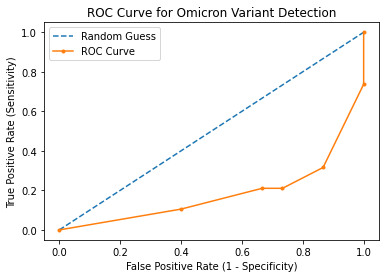

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data into a DataFrame
#data = pd.read_csv('data.csv')

# Define the cutoff values
cutoff_values = [0, 0.2, 0.4, 0.5, 0.6, 0.8, 1]

# Initialize an empty dictionary to store the sensitivity and specificity for each cutoff value
results = {}

# Loop over different cutoff values
for cutoff in cutoff_values:
    # Create a new column in the DataFrame to represent the predicted class based on the cutoff value
    data['Predicted Class'] = data['Probability of New Variant (NV) from the testing laboratory'].apply(lambda x: 'O' if x >= cutoff else 'NV')
    # Calculate the true positives, true negatives, false positives, and false negatives
    tp = ((data['Actual Class'] == 'O') & (data['Predicted Class'] == 'O')).sum()
    tn = ((data['Actual Class'] == 'NV') & (data['Predicted Class'] == 'NV')).sum()
    fp = ((data['Actual Class'] == 'NV') & (data['Predicted Class'] == 'O')).sum()
    fn = ((data['Actual Class'] == 'O') & (data['Predicted Class'] == 'NV')).sum()
    # Calculate the sensitivity and specificity and store them in the dictionary
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    results[cutoff] = (sensitivity, specificity)

# Extract the sensitivity and specificity values from the dictionary
sensitivity_values = [results[c][0] for c in cutoff_values]
specificity_values = [results[c][1] for c in cutoff_values]

# Convert the lists to numpy arrays
sensitivity_values = np.array(sensitivity_values)
specificity_values = np.array(specificity_values)

# Plot the ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.plot(1 - specificity_values, sensitivity_values, marker='.', label='ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Omicron Variant Detection')
plt.legend()

# Print the sensitivity and specificity for each cutoff value
for cutoff in cutoff_values:
    print('Cutoff value:', cutoff)
    print('Sensitivity:', results[cutoff][0])
    print('Specificity:', results[cutoff][1])
    print()

# Find the cutoff value that balances sensitivity and specificity
dists = np.sqrt((1 - specificity_values) ** 2 + sensitivity_values ** 2)
optimal_cutoff = cutoff_values[np.argmin(dists)]
print('Optimal cutoff value:', optimal_cutoff)


In [11]:
# Calculate the true positives, true negatives, false positives, and false negatives
tp_default = ((data['Actual Class'] == 'O') & (data['Probability of New Variant (NV) from the testing laboratory'] >= 0.5)).sum()
tn_default = ((data['Actual Class'] == 'NV') & (data['Probability of New Variant (NV) from the testing laboratory'] < 0.5)).sum()
fp_default = ((data['Actual Class'] == 'NV') & (data['Probability of New Variant (NV) from the testing laboratory'] >= 0.5)).sum()
fn_default = ((data['Actual Class'] == 'O') & (data['Probability of New Variant (NV) from the testing laboratory'] < 0.5)).sum()

# Calculate the MCC
mcc_default = (tp_default * tn_default - fp_default * fn_default) / np.sqrt((tp_default + fp_default) * (tp_default + fn_default) * (tn_default + fp_default) * (tn_default + fn_default))

# Calculate the precision, recall, and F-score
precision_default = tp_default / (tp_default + fp_default)
recall_default = tp_default / (tp_default + fn_default)
f1_score_default = 2 * precision_default * recall_default / (precision_default + recall_default)


In [12]:
# Create a new column in the DataFrame to represent the predicted class based on the optimal cutoff value
data['Predicted Class'] = data['Probability of New Variant (NV) from the testing laboratory'].apply(lambda x: 'O' if x >= optimal_cutoff else 'NV')

# Calculate the true positives, true negatives, false positives, and false negatives
tp_optimal = ((data['Actual Class'] == 'O') & (data['Predicted Class'] == 'O')).sum()
tn_optimal = ((data['Actual Class'] == 'NV') & (data['Predicted Class'] == 'NV')).sum()
fp_optimal = ((data['Actual Class'] == 'NV') & (data['Predicted Class'] == 'O')).sum()
fn_optimal = ((data['Actual Class'] == 'O') & (data['Predicted Class'] == 'NV')).sum()

# Calculate the MCC
mcc_optimal = (tp_optimal * tn_optimal - fp_optimal * fn_optimal) / np.sqrt((tp_optimal + fp_optimal) * (tp_optimal + fn_optimal) * (tn_optimal + fp_optimal) * (tn_optimal + fn_optimal))

# Calculate the precision, recall, and F-score
precision_optimal = tp_optimal / (tp_optimal + fp_optimal)
recall_optimal = tp_optimal / (tp_optimal + fn_optimal)
f1_score_optimal = 2 * precision_optimal * recall_optimal / (precision_optimal + recall_optimal)


<ipython-input-12-7699544e637a>:11: RuntimeWarning: invalid value encountered in true_divide
  mcc_optimal = (tp_optimal * tn_optimal - fp_optimal * fn_optimal) / np.sqrt((tp_optimal + fp_optimal) * (tp_optimal + fn_optimal) * (tn_optimal + fp_optimal) * (tn_optimal + fn_optimal))
<ipython-input-12-7699544e637a>:14: RuntimeWarning: invalid value encountered in long_scalars
  precision_optimal = tp_optimal / (tp_optimal + fp_optimal)


In [13]:

# Print the results
print('Default Threshold (0.5)')
print('MCC:', mcc_default)
print('F-score:', f1_score_default)
print()



Default Threshold (0.5)
MCC: -0.5228070175438596
F-score: 0.23529411764705882

